<a href="https://colab.research.google.com/github/jhj1819/Machine-learning/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import tensorflow as tf

In [ ]:
fashion = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
fashion

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

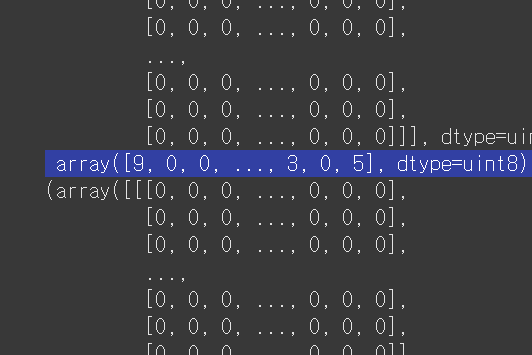

답

튜플이 두개가 있음

이미 케라스에서 train 데이터와 test 데이터로 쪼개놈

In [ ]:
((X_train_original, y_train_original), (X_test, y_test)) = fashion

텐서플로우는 텐서(텐서플로우 데이터셋) or 넘파이 모두 잘 써짐

In [ ]:
X_train_original.shape

(60000, 28, 28)

y_test를 확인해서, 데이터 분포가 고르게 되어있는지 확인하고,

고르게 되어있음을 확인하고, 슬라이싱으로 자름

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

5000개 남기고 짤라서 훌련셋과 검증셋 나눔.

인덱스가 하나만 있을땐, 행 기준임..

In [ ]:
X_train, y_train = X_train_original[:-5000], y_train_original[:-5000]

In [ ]:
X_valid, y_valid = X_train_original[-5000:],  y_train_original[-5000:]

기존 0 ~ 255인 값의 스케일을 255로 나눠 0~1사이로 조정

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
X_train

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

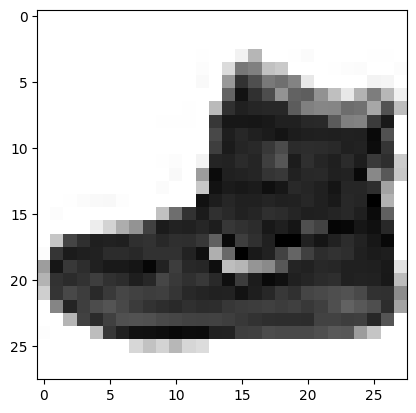

In [ ]:
plt.imshow(X_train[0], cmap='binary')

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

784 * 100 = 78400인데 78500임 ... -> bias 때문

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy']
              )

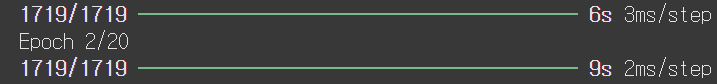

1719의 의미..
default 미니배치의 크기가 32이므로.. : 55000/32 = 1718 ... 나머지: 24

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8718 - loss: 0.3673 - val_accuracy: 0.8460 - val_loss: 0.4181
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8701 - loss: 0.3622 - val_accuracy: 0.8718 - val_loss: 0.3636
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8752 - loss: 0.3535 - val_accuracy: 0.8700 - val_loss: 0.3602
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8795 - loss: 0.3427 - val_accuracy: 0.8672 - val_loss: 0.3735
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8812 - loss: 0.3338 - val_accuracy: 0.8696 - val_loss: 0.3507
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8843 - loss: 0.3258 - val_accuracy: 0.8712 - val_loss: 0.3428
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8849 - loss: 0.3228 - val_accuracy: 0.8752 - val_loss: 0.3507
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8857 - loss: 0.3174 -

In [ ]:
import pandas as pd

In [ ]:
history.history ## 딕셔너리

{'accuracy': [0.8698727488517761,
  0.870090901851654,
  0.8750545382499695,
  0.8772000074386597,
  0.8801817893981934,
  0.881709098815918,
  0.8836545348167419,
  0.8861272931098938,
  0.8881090879440308,
  0.8896545171737671,
  0.8917090892791748,
  0.8928363919258118,
  0.8936363458633423,
  0.8951454758644104,
  0.897490918636322,
  0.8995636105537415,
  0.8998363614082336,
  0.9016545414924622,
  0.9035999774932861,
  0.9039090871810913],
 'loss': [0.37071314454078674,
  0.36185312271118164,
  0.35236451029777527,
  0.3450016975402832,
  0.33679911494255066,
  0.329913854598999,
  0.32438230514526367,
  0.31854814291000366,
  0.31305354833602905,
  0.3069152235984802,
  0.3018532693386078,
  0.296550452709198,
  0.2920672297477722,
  0.2872317433357239,
  0.2824667692184448,
  0.2787376642227173,
  0.2755350172519684,
  0.2705492377281189,
  0.2669849693775177,
  0.2632349729537964],
 'val_accuracy': [0.8460000157356262,
  0.8718000054359436,
  0.8700000047683716,
  0.8672000169

In [ ]:
history_df = pd.DataFrame(history.history) ## dataFrame 형태로 변경

In [ ]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.869873,0.370713,0.8460,0.418068
1,0.870091,0.361853,0.8718,0.363592
2,0.875055,0.352365,0.8700,0.360165
3,0.877200,0.345002,0.8672,0.373461
4,0.880182,0.336799,0.8696,0.350657
5,0.881709,0.329914,0.8712,0.342759
6,0.883655,0.324382,0.8752,0.350697
7,0.886127,0.318548,0.8726,0.340361
8,0.888109,0.313054,0.8784,0.340578
9,0.889655,0.306915,0.8778,0.337703


<Axes: >

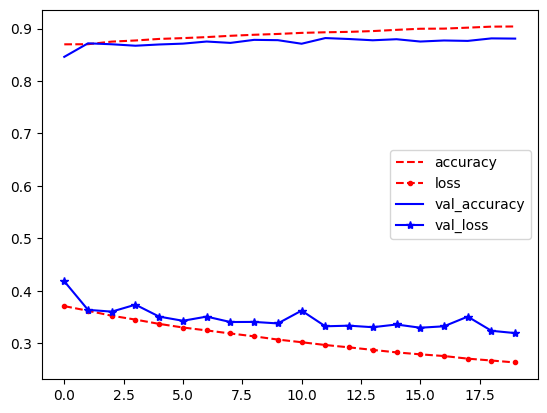

In [ ]:
history_df.plot(style=["r--","r--.","b-","b-*"])

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8734 - loss: 0.3549


[0.35177624225616455, 0.8747000098228455]